## 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

In [2]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1000,100)
        self.fc2 = nn.Linear(100,10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        h = self.fc1(x)
        h_relu = self.relu(h)
        y_pred = self.fc2(h_relu)
        
        return y_pred

程序作用相当于拟合一条曲线使得f(input) = target

In [3]:
model = Model()
loss_fn = nn.MSELoss(reduction='sum')
optim = torch.optim.SGD(model.parameters(),lr=1e-5)

In [4]:
input = torch.randn(64, 1000)
target = torch.randn(64, 10)
for i in range(5000):
    optim.zero_grad()
    output = model(input)
    loss = loss_fn(output,target)
    loss.backward()
    optim.step()
    if i % 500 == 0:
        print(i,loss)

0 tensor(688.5259, grad_fn=<MseLossBackward>)
500 tensor(34.9039, grad_fn=<MseLossBackward>)
1000 tensor(2.1985, grad_fn=<MseLossBackward>)
1500 tensor(0.2162, grad_fn=<MseLossBackward>)
2000 tensor(0.0266, grad_fn=<MseLossBackward>)
2500 tensor(0.0037, grad_fn=<MseLossBackward>)
3000 tensor(0.0006, grad_fn=<MseLossBackward>)
3500 tensor(9.0121e-05, grad_fn=<MseLossBackward>)
4000 tensor(1.5045e-05, grad_fn=<MseLossBackward>)
4500 tensor(2.7001e-06, grad_fn=<MseLossBackward>)


## 2

In [5]:
print(torch.cuda.is_available())

True


In [6]:
torch.__version__

'1.1.0'

## 3

In [10]:
x = torch.linspace(-5,5,200).reshape(200,1)
x = x[torch.randperm(x.size(0))]

y = torch.linspace(0,30,200).reshape(200,1)
y = y[torch.randperm(y.size(0))]

data = torch.cat((x,y),1)

target = 2 * x.pow(2) + y.sqrt() + 0.2 * torch.rand(200,1)

In [11]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(n_input, 20)
        self.relu = F.relu
        self.output1 = nn.Linear(20, n_output)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.output1(x)
        return x

In [12]:
model = Net(2,1)
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(),lr=5e-3)

In [13]:
for i in range(20001):
    optim.zero_grad()
    output = model(data)
    loss = loss_fn(output,target)
    loss.backward()
    optim.step()
    if i % 2000 == 0:
        print(i,loss)

0 tensor(650.9348, grad_fn=<MseLossBackward>)
2000 tensor(0.4555, grad_fn=<MseLossBackward>)
4000 tensor(0.0787, grad_fn=<MseLossBackward>)
6000 tensor(0.0272, grad_fn=<MseLossBackward>)
8000 tensor(0.0192, grad_fn=<MseLossBackward>)
10000 tensor(0.0170, grad_fn=<MseLossBackward>)
12000 tensor(0.0166, grad_fn=<MseLossBackward>)
14000 tensor(0.0170, grad_fn=<MseLossBackward>)
16000 tensor(0.0198, grad_fn=<MseLossBackward>)
18000 tensor(0.0169, grad_fn=<MseLossBackward>)
20000 tensor(0.0203, grad_fn=<MseLossBackward>)


### 原始曲面

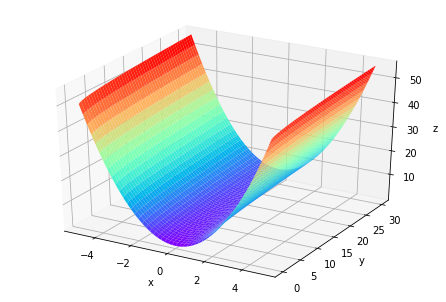

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure()
ax = Axes3D(fig)
 
X = np.linspace(-5,5,200)
Y = np.linspace(0,30,200)
X, Y = np.meshgrid(X, Y)
# Z = output.detach().numpy().reshape(-1)
Z = 2 * np.square(X) + np.sqrt(Y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surf = ax.plot_surface(X, Y, Z,  cmap=plt.get_cmap('rainbow'))

### 拟合曲面

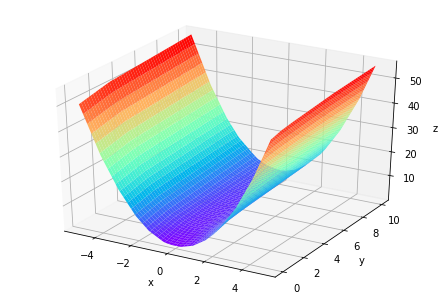

In [15]:
X = torch.linspace(-5,5,200).reshape(200,1)
Y = torch.linspace(0,30,200).repeat(200,1).transpose(1,0)
Z = torch.zeros(200,200)
for i in range(200):
    test = torch.cat((X,Y[i].reshape(200,1)),1)
    Z[i] = model(test).reshape(200,)
Z = Z.detach().numpy()
# print(Z)
X = np.linspace(-5,5,200)
Y = np.linspace(0,10,200)
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surf = ax.plot_surface(X, Y, Z,  cmap=plt.get_cmap('rainbow'))

## 4

In [16]:
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [17]:
n_data = torch.ones(100, 2)
data = []
label = []
for i in range(5):
    data.append(torch.normal(5 * i * n_data, 1))
    label.append(torch.zeros(100) + i)
x = torch.cat((data), 0).type(torch.FloatTensor)
y = torch.cat((label), ).type(torch.LongTensor)
data, target = Variable(x), Variable(y)

In [18]:
class Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c = y.data.numpy(), s = 100, lw = 0, cmap = 'RdYlGn')
        plt.show()
        
    def __getitem__(self, item):
        return self.x[item], self.y[item]

    def __len__(self):
        return len(self.y)

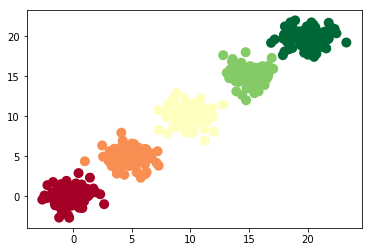

In [19]:
dataset = Dataset(data, target)
dataloader = DataLoader(dataset, batch_size = 100, shuffle = True)

In [20]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.prediction = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.prediction(x)
        return x

In [21]:
net = Net(n_feature = 2, n_hidden = 10, n_output = 5)

In [22]:
optimizer = torch.optim.SGD(net.parameters(), lr = 5e-3)
loss_func = torch.nn.CrossEntropyLoss()

0 tensor(1.6878, grad_fn=<NllLossBackward>) 0.244


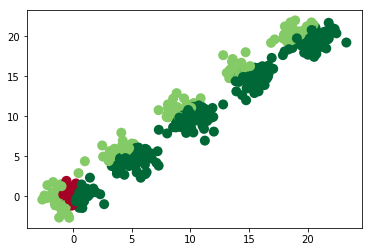

100 tensor(1.1964, grad_fn=<NllLossBackward>) 0.49


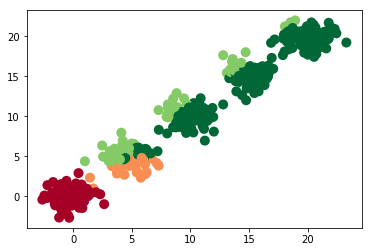

200 tensor(0.9857, grad_fn=<NllLossBackward>) 0.566


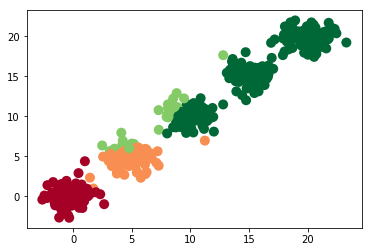

300 tensor(0.8662, grad_fn=<NllLossBackward>) 0.648


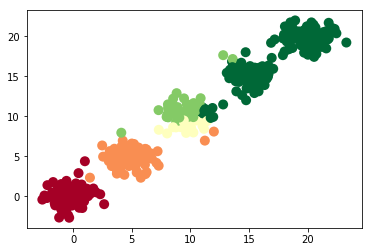

400 tensor(0.7881, grad_fn=<NllLossBackward>) 0.736


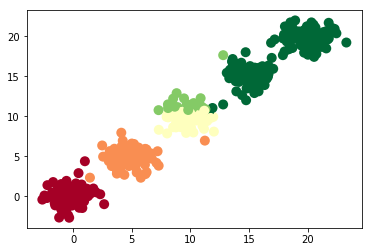

500 tensor(0.7046, grad_fn=<NllLossBackward>) 0.816


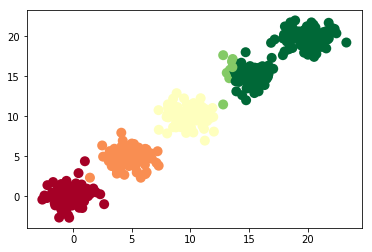

600 tensor(0.6038, grad_fn=<NllLossBackward>) 0.986


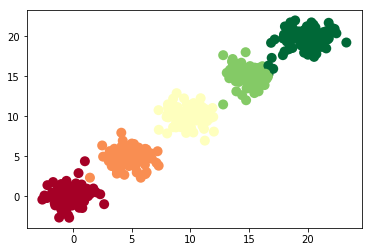

700 tensor(0.5319, grad_fn=<NllLossBackward>) 0.964


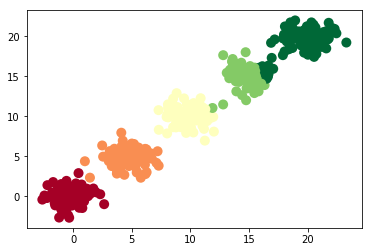

800 tensor(0.5002, grad_fn=<NllLossBackward>) 0.906


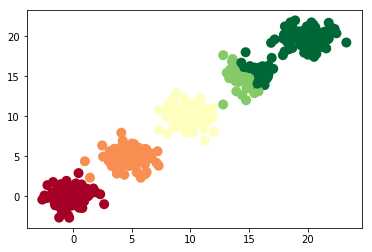

900 tensor(0.4595, grad_fn=<NllLossBackward>) 0.998


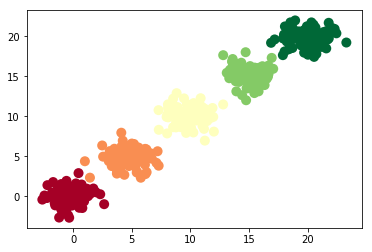

1000 tensor(0.4230, grad_fn=<NllLossBackward>) 0.988


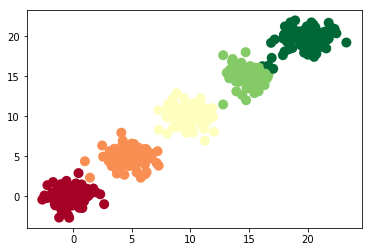

1100 tensor(0.3761, grad_fn=<NllLossBackward>) 0.99


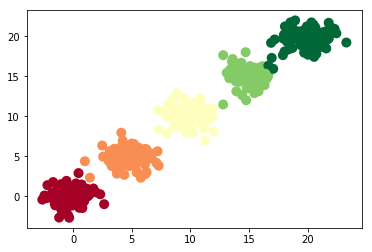

1200 tensor(0.3293, grad_fn=<NllLossBackward>) 0.994


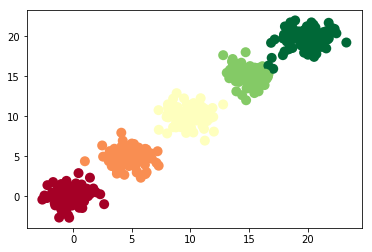

1300 tensor(0.2697, grad_fn=<NllLossBackward>) 0.95


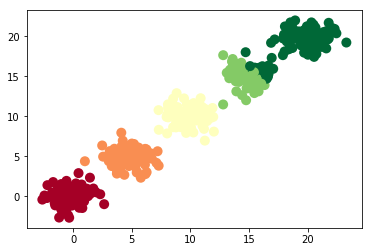

1400 tensor(0.2468, grad_fn=<NllLossBackward>) 0.998


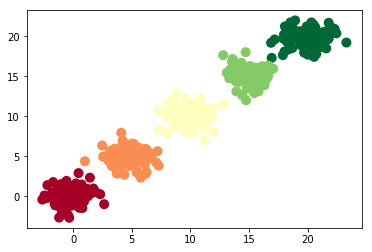

In [23]:
for i in range(1500):
    for x, y in dataloader:
        pred = net(x)
        loss = loss_func(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if i % 100 == 0:
        pred = net(data)
        pred_label = torch.max(pred, 1)[1]
        pred_label = pred_label.detach().numpy()
        target_label = target.numpy()
        plt.scatter(data.data.numpy()[:, 0], data.data.numpy()[:, 1], c = pred_label, s = 100, lw = 0, cmap = 'RdYlGn')
        accuracy = (pred_label == target_label).sum() / target_label.size
        print(i,loss,accuracy)
        plt.show()